<a href="https://colab.research.google.com/github/lseidy/IA_learning/blob/main/ID3_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Relatório de Entrega

Foi desenvolvido o algoritmo da árvore IDE para treinar o Dataset NPHA

O código foi desenvolvido utilizando o COLAB e é dividido em 3 etapas:

- Pré Processamento dos Dados
- Treinamento da árvore
- Teste e Avaliação

#### Pre Processamento
O banco de dados foi baixado e analisado para encontrar dados faltantes. Além disso verifiquei a correlação entre os dados em relação a coluna Target = "Number of Doctors Visited" e removi as colunas com correlação muito pequena ou negativa. Por fim, após as verificações o conjunto de dados foi separado em Treino e Teste.

### Treino e teste
O ID3 é chamado passando as informações de treino e monta a arvore baseado no calculo realizado no ID3, atingindo uma acuracia de 50%.

### Dataset

Dataset: https://drive.google.com/file/d/1RO9Mh0hK4AfxzskCq0T23Bxt17_Sn72Y/view?usp=sharing

In [ ]:
!gdown '1RO9Mh0hK4AfxzskCq0T23Bxt17_Sn72Y'

Downloading...
From: https://drive.google.com/uc?id=1RO9Mh0hK4AfxzskCq0T23Bxt17_Sn72Y
To: /content/NPHA-doctor-visits.csv
100% 21.8k/21.8k [00:00<00:00, 48.2MB/s]


## Analise dos Dados

In [ ]:
import pandas as pd
df = pd.read_csv("NPHA-doctor-visits.csv")
df

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,2,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,2,3,1,3,3,1,0,1,1,1,3,3,1,2


In [ ]:
df.columns, df.dtypes

(Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Mental Health',
        'Dental Health', 'Employment', 'Stress Keeps Patient from Sleeping',
        'Medication Keeps Patient from Sleeping',
        'Pain Keeps Patient from Sleeping',
        'Bathroom Needs Keeps Patient from Sleeping',
        'Uknown Keeps Patient from Sleeping', 'Trouble Sleeping',
        'Prescription Sleep Medication', 'Race', 'Gender'],
       dtype='object'),
 Number of Doctors Visited                     int64
 Age                                           int64
 Phyiscal Health                               int64
 Mental Health                                 int64
 Dental Health                                 int64
 Employment                                    int64
 Stress Keeps Patient from Sleeping            int64
 Medication Keeps Patient from Sleeping        int64
 Pain Keeps Patient from Sleeping              int64
 Bathroom Needs Keeps Patient from Sleeping    int64
 Uknown Keeps P

<Axes: >

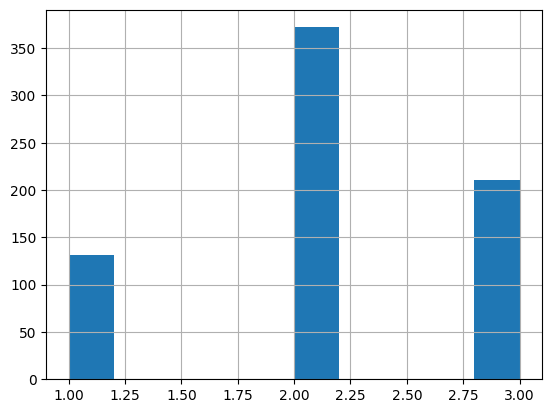

In [ ]:
df["Number of Doctors Visited"].hist()

In [ ]:
df.isnull().sum(), df.isna().sum()

(Number of Doctors Visited                     0
 Age                                           0
 Phyiscal Health                               0
 Mental Health                                 0
 Dental Health                                 0
 Employment                                    0
 Stress Keeps Patient from Sleeping            0
 Medication Keeps Patient from Sleeping        0
 Pain Keeps Patient from Sleeping              0
 Bathroom Needs Keeps Patient from Sleeping    0
 Uknown Keeps Patient from Sleeping            0
 Trouble Sleeping                              0
 Prescription Sleep Medication                 0
 Race                                          0
 Gender                                        0
 dtype: int64,
 Number of Doctors Visited                     0
 Age                                           0
 Phyiscal Health                               0
 Mental Health                                 0
 Dental Health                                 0
 Empl

In [ ]:
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [ ]:

df[df.columns].corr()['Number of Doctors Visited']

,Number of Doctors Visited
Number of Doctors Visited,1.000000
Age,NaN
Phyiscal Health,0.169629
Mental Health,0.049990
Dental Health,0.009371
Employment,0.092578
Stress Keeps Patient from Sleeping,0.053040
Medication Keeps Patient from Sleeping,0.120549
Pain Keeps Patient from Sleeping,0.081990
Bathroom Needs Keeps Patient from Sleeping,0.056043


In [ ]:
#df = df.drop('Age',axis=1)
df = df.drop('Gender',axis=1)
df = df.drop('Race',axis=1)
df = df.drop('Uknown Keeps Patient from Sleeping',axis=1)
df = df.drop('Dental Health',axis=1)
df = df.drop('Trouble Sleeping', axis=1)
df = df.drop('Prescription Sleep Medication', axis=1)
df = df.drop('Mental Health',axis=1)
df.columns

Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Employment',
       'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping'],
      dtype='object')

## Pre Process

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, Y_Test = train_test_split(df, test_size=0.3, stratify=df["Number of Doctors Visited"], random_state=0)

In [ ]:
X_Train.head()

,Number of Doctors Visited,Age,Phyiscal Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping
598,1,2,2,1,0,0,0,1
454,3,2,4,3,0,0,1,0
269,3,2,2,3,1,0,0,1
681,2,2,3,3,0,0,1,1
606,1,2,2,3,0,0,0,1


In [ ]:
X_Train.to_csv('X_Train_ID3.csv', sep = ',')
Y_Test.to_csv('Y_Test_ID3.csv', sep = ',')

In [ ]:
X_Train.columns

Index(['Number of Doctors Visited', 'Age', 'Phyiscal Health', 'Employment',
       'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping'],
      dtype='object')

In [ ]:
!pip install graphviz
!sudo apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import numpy as np
from operator import itemgetter
from graphviz import Digraph

#Classe que define o no da arvores com um dicionario para os nodos
class Node:
  def __init__(self,att=None,label=None):
    self.att = att
    self.label = label
    self.leafs = {}
  def add_leaf(self,value,leaf):
    self.leafs[value] = leaf

class ID3:
  def __init__(self):
    self.tree = None

  def plot_tree(self):
    if self.tree is None:
        raise Exception("The classifier must be trained before plotting the tree.")

    dot = Digraph(comment='Decision Tree')
    self._add_nodes_edges(self.tree, dot)
    dot.render('decision_tree', format='png', cleanup=True)  # Salva e renderiza a árvore como PNG
    print("Salvo como PNG")
    dot.view()  # Abre a imagem renderizada

  def _add_nodes_edges(self, node, dot, parent=None, value=None):
      node_id = str(id(node))  # Identificador único para cada nó

      # Adiciona o nó
      if node.label is not None:
        dot.node(node_id, label=str(node.label), shape='ellipse')
      else:
        dot.node(node_id, label=str(node.att), shape='box')

      # Adiciona a aresta se houver um pai
      if parent is not None:
        label = str(value) if value is not None else ''
        dot.edge(parent, node_id, label=label)

      # Adiciona os filhos
      for val, child in node.leafs.items():
        self._add_nodes_edges(child, dot, node_id, val)

  def entropy(self, Target, index):

    #target = Target.loc[index]
    values = Target.loc[index].values#itemgetter(*index)(Target)
    #print(values)
    entropy = 0

    #Calculo da entropia passando os valores unicos do conjunto passado
    for value in np.unique(values).astype(str):
      pi = len(Target[Target == value])/len(Target)
      entropy = entropy - pi*np.log2(pi + 1e-8)
    return entropy

  def gain(self, X_Train, Target, att):
    values = X_Train[att].unique()
    soma = 0

    entropy = self.entropy(Target, Target.index)

    for i in values:
      X_sub = X_Train[X_Train[att]==i]
      pv = len(X_sub) / len(X_Train)

      Ev = self.entropy(X_sub[Target.name],X_Train[X_Train[att]==i].index)
      soma = soma + pv*Ev

    return entropy - soma

  #define melhor atributo dentre os atributos ainda disponiveis baseado em seu ganho
  def choose_att(self, X_Train, Target, att):
    gain = []

    for i in att:
      ganho = self.gain(X_Train, Target, i)
      gain.append(ganho)

    return att[np.argmax(gain)]

  # retorna o indice que mais aparece
  def better_class(self, Target):
    return Target.value_counts().idxmax()

  def construct(self, X_Train, Target, att):
    leaf = Node()

    if len(np.unique(Target)) == 1:
      leaf.label = Target.unique()
      return leaf

    if len(att) == 0:
      leaf.label = self.better_class(Target)
      return leaf

    better = self.choose_att(X_Train, Target, att)

    leaf.att = better

    #Exclui atributo anterior
    new_att = []
    for i in att:
      if i != better:
        new_att.append(i)

    att = new_att

    #Chama a função recursivamente para testar subarvores de um atributo
    for i in X_Train[better].unique():
      n_train_set = X_Train[X_Train[better] == i]
      n_targ_set = Target[X_Train[better] == i]

      if len(n_train_set) == 0:
        seed = Node(label = self.better_class(Target))
      else:
        seed = self.construct(n_train_set,n_targ_set, att)

      leaf.add_leaf(i, seed)

    return leaf

  #caminha entre os nodos da arvore
  def navigate(self, test, leaf):
    if leaf.label is not None:
      return leaf.label

    value = test[leaf.att]

    if value not in leaf.leafs:
      return 0

    next = leaf.leafs[value]
    return self.navigate(test, next)

  def get_tree(self):
    return self.tree

  # Testa
  def fit(self, X_Train, Target):
    att = X_Train.drop(Target.name, axis=1).columns
    self.tree = self.construct(X_Train, Target, att)
  def predict(self, Y_test):
    predictions = []
    for i in range(0,len(Y_test)):
      prediction = self.navigate(Y_test.iloc[i], self.tree)
      predictions.append(prediction)

    return np.array(predictions, dtype=object)


In [ ]:
X_Train = pd.read_csv('/content/X_Train_ID3.csv')

X_Train

,Unnamed: 0,Number of Doctors Visited,Age,Phyiscal Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping
0,598,1,2,2,1,0,0,0,1
1,454,3,2,4,3,0,0,1,0
2,269,3,2,2,3,1,0,0,1
3,681,2,2,3,3,0,0,1,1
4,606,1,2,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
494,195,2,2,2,3,0,0,0,1
495,320,2,2,1,3,0,0,0,0
496,682,2,2,4,3,0,0,0,0
497,584,2,2,4,3,1,0,1,1


In [ ]:
train = ID3()

X_Train = pd.read_csv('/content/X_Train_ID3.csv')
X_Train = X_Train.drop('Unnamed: 0', axis=1)
#X_Train = X_Train.drop('Number of Doctors Visited', axis=1)

Y_Train = X_Train['Number of Doctors Visited'].copy()
train.fit(X_Train,Y_Train)

train.plot_tree()

Salvo como PNG


In [ ]:
Y_Test = pd.read_csv('/content/Y_Test_ID3.csv')
Y_Test.columns

Index(['Unnamed: 0', 'Number of Doctors Visited', 'Age', 'Phyiscal Health',
       'Employment', 'Stress Keeps Patient from Sleeping',
       'Medication Keeps Patient from Sleeping',
       'Pain Keeps Patient from Sleeping',
       'Bathroom Needs Keeps Patient from Sleeping'],
      dtype='object')

In [ ]:
Y_Test = Y_Test.drop('Unnamed: 0', axis=1)
Target = Y_Test['Number of Doctors Visited']
Y_Test = Y_Test.drop('Number of Doctors Visited', axis=1)
x = train.predict(Y_Test)

predict =[]
for i in x:
  if isinstance(i, np.ndarray):
    predict.append(i.item())
  else:
    predict.append(i)

Target = list(Target)
predict = list(predict)
print(type(Target), Target)
print(type(predict), predict)

<class 'list'> [1, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 1]
<class 'list'> [3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

acc = accuracy_score(Target, predict)

print(acc)

0.5023255813953489


In [ ]:
print(classification_report(Target, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.38      0.08      0.13        39
           2       0.53      0.80      0.64       112
           3       0.60      0.23      0.34        64

    accuracy                           0.50       215
   macro avg       0.38      0.28      0.28       215
weighted avg       0.52      0.50      0.46       215



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
confusion_matrix(Target, predict)

array([[ 0,  0,  0,  0],
       [ 1,  3, 34,  1],
       [10,  3, 90,  9],
       [ 2,  2, 45, 15]])